# **Project Name**    - SHOPPER SPECTRUM

##### **Project Type**    - Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce
Using Machine Learning (KMeans Clustering) and Data Visualization in Jupyter Notebook
##### **Contribution**    - Individual
### **NAME**          - Shivam Shashank

# **Project Summary -**

Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce is a machine learning project designed to extract actionable insights from real-world e-commerce transaction data. The core objective is to analyze customer purchase behaviors, group similar customers using unsupervised learning techniques, and build a product recommendation engine using collaborative filtering. This project bridges the gap between customer understanding and personalized marketing in the e-commerce industry.

The dataset consists of transaction-level details from an online retail platform for the years 2022–2023. It includes columns such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. The initial steps involve understanding the data structure, identifying missing values, removing duplicate or invalid entries, and filtering out cancelled or negative transactions.

The preprocessing stage ensures the data is clean and usable for advanced analytics. Records with missing CustomerIDs are removed, along with transactions that have negative or zero quantity or unit prices. Cancelled orders, identifiable by Invoice numbers beginning with 'C', are also excluded.

For the Exploratory Data Analysis (EDA) phase, multiple visualizations are developed to analyze purchasing trends by country, identify top-selling products, and observe customer behavior over time. This includes transaction volumes, monetary distribution per customer, and temporal trends. RFM (Recency, Frequency, Monetary) analysis is used to quantify customer behavior and lay the foundation for segmentation.

In the Clustering phase, RFM metrics are computed for each customer:

Recency indicates how recently a customer made a purchase.

Frequency denotes how often they purchase.

Monetary reflects the total amount spent.

These features are scaled and used in clustering algorithms such as KMeans. Optimal cluster count is determined using the Elbow Method and Silhouette Score. Based on RFM patterns, customers are categorized into segments like:

High-Value (frequent, recent, big spenders),

Regular,

Occasional, and

At-Risk (haven’t purchased in a long time).

The second major module is the Recommendation System, which uses Item-Based Collaborative Filtering. A customer-item matrix is built, and cosine similarity is computed between products. This allows recommending 5 similar products based on a user’s input product name—helping mimic e-commerce recommendation engines like those used by Amazon or Flipkart.

The final outcome is a Streamlit Web App that integrates both major modules:

# Product Recommendation Module –
 Takes a product name and shows 5 similar items.

# Customer Segmentation Module –
 Accepts RFM values and predicts the customer cluster.

This project applies skills such as data cleaning, feature engineering, clustering algorithms, collaborative filtering, model evaluation, and interactive app development. Visualizations include cluster plots, similarity matrices, and purchase trend graphs. It provides practical business insights like personalized marketing, churn prediction, and inventory planning.

With real-time input and model deployment using Streamlit, this project showcases the complete data science workflow from raw data to business impact.

# **GitHub Link -**

# **Problem Statement**

The global e-commerce industry generates vast volumes of transaction data every day, offering a goldmine of insights into customer purchasing behavior. However, most businesses struggle to convert this raw data into actionable strategies that enhance customer experience and drive revenue. Identifying patterns in customer purchases and understanding customer types are crucial for optimizing marketing strategies, boosting customer retention, and increasing sales.

This project aims to address two core business challenges:

# Customer Segmentation:
By analyzing historical transaction data using Recency, Frequency, and Monetary (RFM) analysis, we can segment customers into meaningful groups such as High-Value, Regular, Occasional, and At-Risk. These segments help in targeting customers with personalized marketing campaigns and loyalty programs, resulting in improved engagement and retention.

# Product Recommendation:
Using collaborative filtering techniques, the system recommends relevant products to users based on past purchase patterns and product similarity. This mimics real-world recommendation systems used by e-commerce giants and helps improve user satisfaction and average order value by offering personalized product suggestions.

The solution involves comprehensive data preprocessing, exploratory data analysis (EDA), feature engineering, clustering via unsupervised machine learning, and the implementation of a real-time recommendation engine—all wrapped in an interactive Streamlit web application.

Ultimately, the project enables e-commerce businesses to understand customer behavior better, offer tailored shopping experiences, and make data-driven decisions to improve customer loyalty and business performance.



# 1 Import Required Libraries

In [234]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# 2 Load Dataset

In [235]:

# 📌 Step 2: Load Dataset
df = pd.read_csv("D:/shopper-spectrum/data/online_retail.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


 We load the Online Retail dataset which contains transactional data of a UK-based online retail store from 2010 to 2011. 

# 3 Basic Cleaning

In [236]:

df.dropna(subset=["CustomerID"], inplace=True)
df = df[df['Quantity'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


To ensure data quality, we remove:

Missing Customer IDs

Negative quantities (returns)

Convert InvoiceDate to datetime format

Create TotalPrice column = Quantity × UnitPrice

# 4  EDA – Top 10 Countries by Unique Customers

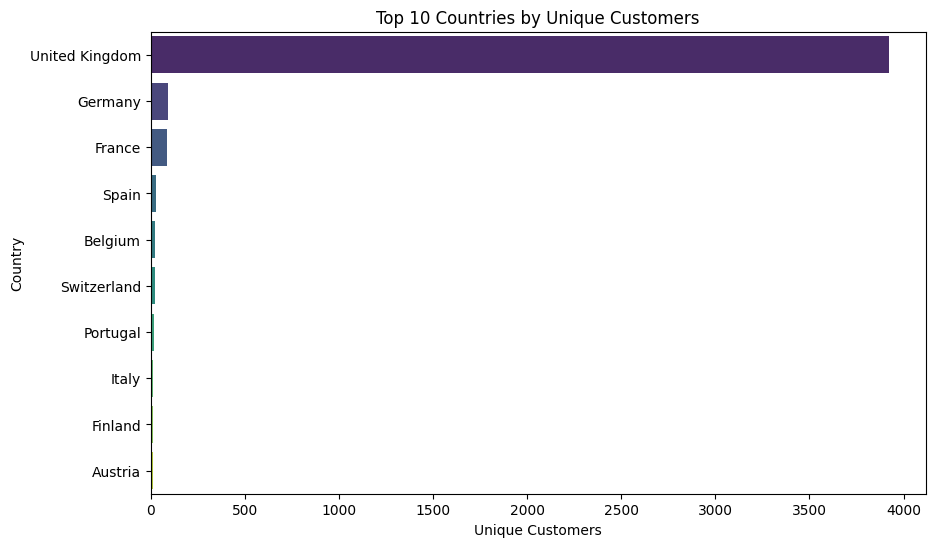

In [237]:

country_data = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_data.values, y=country_data.index, palette='viridis')
plt.title("Top 10 Countries by Unique Customers")
plt.xlabel("Unique Customers")
plt.show()


We identify countries with the highest number of unique customers using a bar plot.

# 5 RFM Table Creation

In [238]:

snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


We calculate:

Recency: Days since last purchase

Frequency: Number of invoices

Monetary: Total amount spent

# 6 Remove Outliers

In [239]:
# 📌 Step 6: Remove Outliers
rfm = rfm[(rfm['Monetary'] > 0)]
rfm = rfm[rfm['Monetary'] < rfm['Monetary'].quantile(0.99)]
rfm.head()


,CustomerID,Recency,Frequency,Monetary
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,8,2506.04


Remove customers with:

Monetary value = 0

Extremely high monetary values (top 1%)

# 7: Feature Scaling

In [240]:

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


Normalize the Recency, Frequency, and Monetary values using StandardScaler to prepare for clustering.


 # 8: Elbow Method for Optimal Clusters

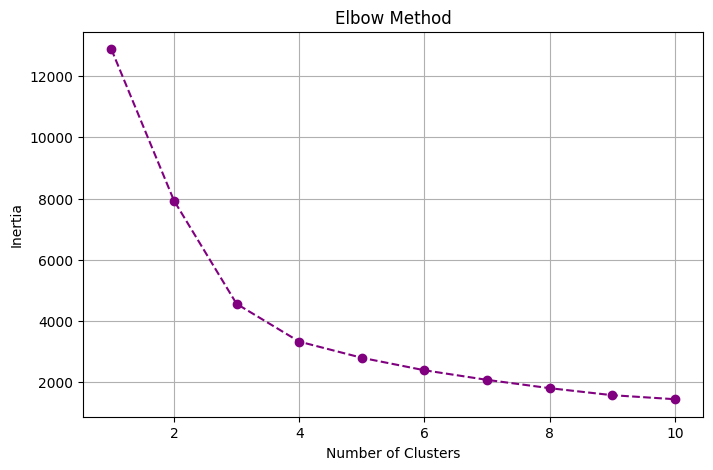

In [241]:
# 📌 Step 8: KMeans Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='purple')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()



Use the Elbow Method to find the ideal number of clusters based on inertia (within-cluster sum of squares).

# 9  Apply KMeans Clustering

In [242]:
# 📌 Step 9: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster
1,12347.0,2,7,4310.00,3
2,12348.0,75,4,1797.24,0
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,1
5,12352.0,36,8,2506.04,3


Apply KMeans with the chosen number of clusters (e.g., 4) to segment customers.

# 10 Cluster Analysis

In [243]:

rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)


Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         49.72      2.54   785.94  2448
1        251.76      1.48   434.10  1025
2         14.18     21.70  9847.37   138
3         27.25      8.59  3414.32   683

Analyze each cluster by comparing average Recency, Frequency, and Monetary values and the number of customers.

# 11  Visualize Clusters

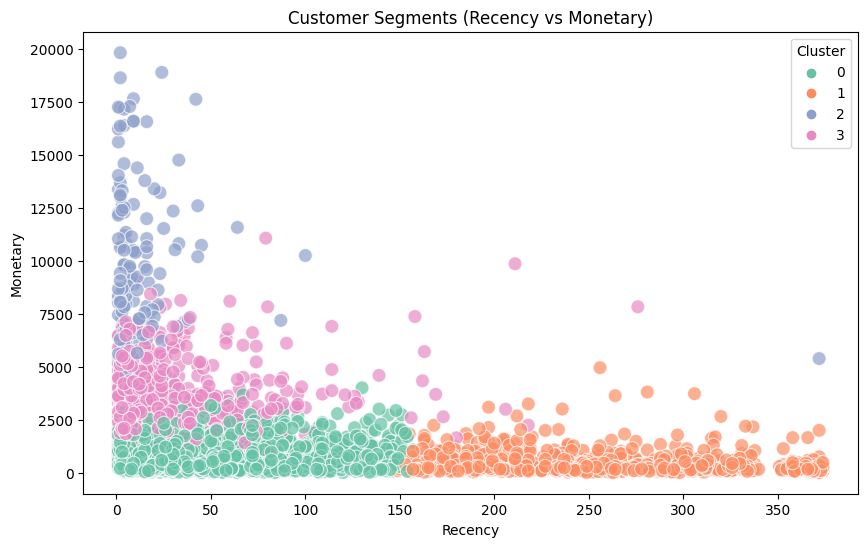

In [244]:
# 📌 Step 11: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title("Customer Segments (Recency vs Monetary)")
plt.show()


Scatter plot showing distribution of customer clusters by Recency and Monetary.

# 12 Pie Chart – Cluster Proportions

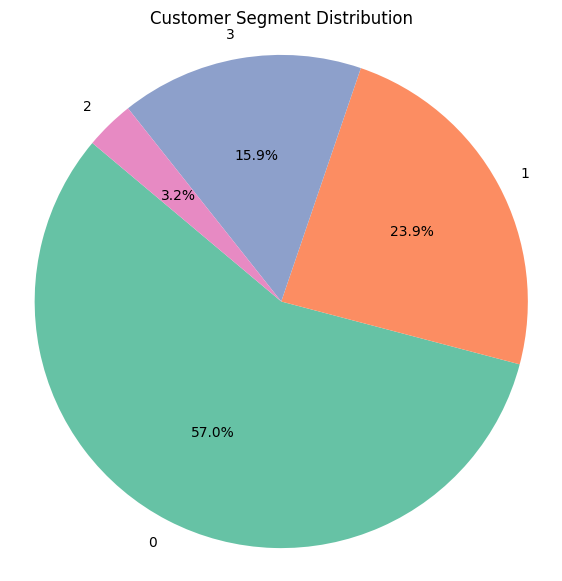

In [245]:

cluster_counts = rfm['Cluster'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title("Customer Segment Distribution")
plt.axis('equal')
plt.show()


Pie chart to visualize what percentage of customers fall into each segment.

# 13 Save Final Segmented Data

In [246]:

rfm_sorted = rfm.sort_values('Cluster')
rfm_sorted.to_csv("D:/shopper-spectrum/outputs/customer_segments.csv", index=False)
rfm_sorted.head()


,CustomerID,Recency,Frequency,Monetary,Cluster
2170,15300.0,64,1,496.44,0
2502,15748.0,40,1,149.31,0
2507,15754.0,51,3,458.57,0
2509,15756.0,61,4,532.96,0
2510,15757.0,66,2,714.42,0


Save the final RFM + cluster dataset to a CSV file for further analysis or business use.